## Multi-Class Prediction of Obesity Risk

Bu projede obezite riskini tahmin edecek çok sınıflı tahmin modeli geliştirilmektedir. Bir Kaggle yarışması olan projede kullanılan veriler [buradan](https://www.kaggle.com/competitions/playground-series-s4e2/data) temin edilmiştir.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


## Keşfedici Veri Analizi (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
test=pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [7]:
df=pd.concat([df,test], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34598 entries, 0 to 34597
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34598 non-null  int64  
 1   Gender                          34598 non-null  object 
 2   Age                             34598 non-null  float64
 3   Height                          34598 non-null  float64
 4   Weight                          34598 non-null  float64
 5   family_history_with_overweight  34598 non-null  object 
 6   FAVC                            34598 non-null  object 
 7   FCVC                            34598 non-null  float64
 8   NCP                             34598 non-null  float64
 9   CAEC                            34598 non-null  object 
 10  SMOKE                           34598 non-null  object 
 11  CH2O                            34598 non-null  float64
 12  SCC                             

<Axes: xlabel='Gender', ylabel='count'>

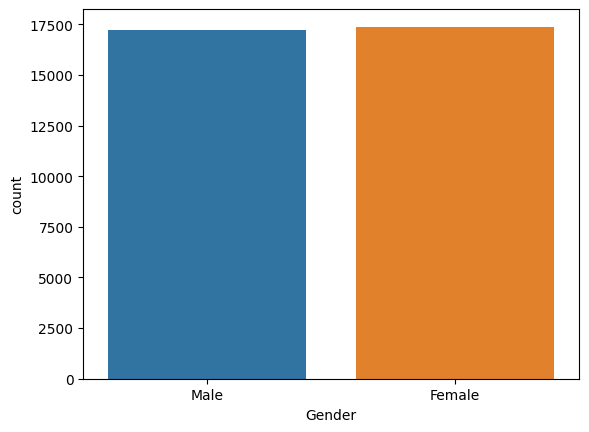

In [10]:
sns.countplot(x=df["Gender"])

In [11]:
df["Gender"]=np.where(df["Gender"]=="Male", 1, 0)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


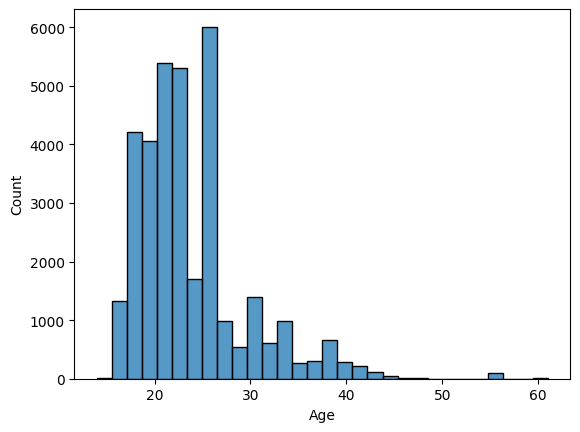

In [15]:
sns.histplot(x=df["Age"], bins=30);

In [23]:
df["family_history_with_overweight"].value_counts()

family_history_with_overweight
yes    28398
no      6200
Name: count, dtype: int64

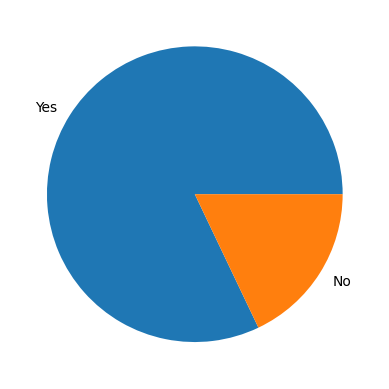

In [22]:
plt.pie(x=df["family_history_with_overweight"].value_counts(), labels=["Yes", "No"]);

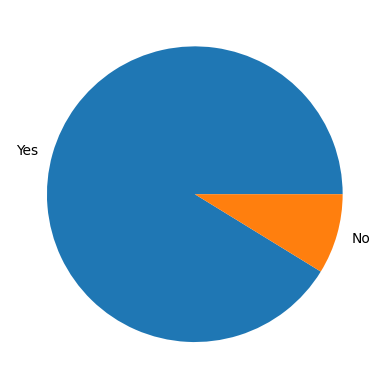

In [25]:
plt.pie(x=df["FAVC"].value_counts(), labels=["Yes", "No"]);

SMOKE
no     34173
yes      425
Name: count, dtype: int64


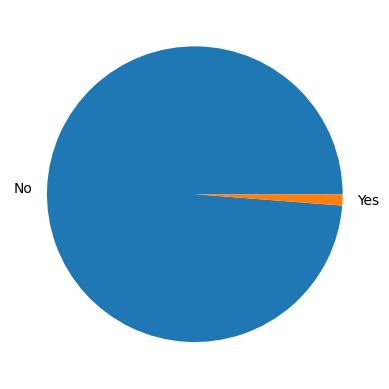

In [30]:
print(df["SMOKE"].value_counts())
plt.pie(x=df["SMOKE"].value_counts(), labels=["No", "Yes"]);

SCC
no     33447
yes     1151
Name: count, dtype: int64


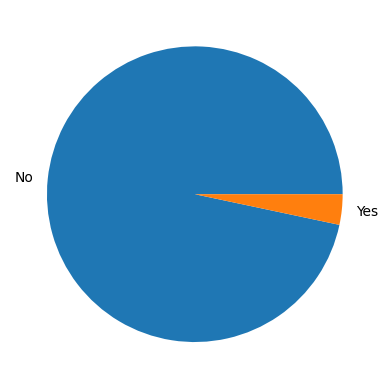

In [31]:
print(df["SCC"].value_counts())
plt.pie(x=df["SCC"].value_counts(), labels=["No", "Yes"]);

In [ ]:
df["family_history_with_overweight"]=np.where(df["family_history_with_overweight"]=="yes", 1, 0)
df["FAVC"]=np.where(df["FAVC"]=="yes", 1, 0)
df["SMOKE"]=np.where(df["SMOKE"]=="yes", 1, 0)
df["SCC"]=np.where(df["SCC"]=="yes", 1, 0)

CAEC
Sometimes     29218
Frequently     4089
Always          837
no              454
Name: count, dtype: int64


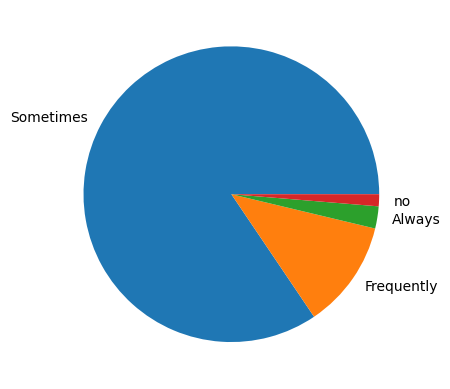

In [34]:
print(df["CAEC"].value_counts())
plt.pie(x=df["CAEC"].value_counts(), labels=df["CAEC"].value_counts().index, );

In [36]:
d={"Sometimes":1, "Frequently":2, "Always":4, "no":0}
df["CAEC"]=df["CAEC"].map(d)

CALC
Sometimes     25045
no             8676
Frequently      875
Always            2
Name: count, dtype: int64


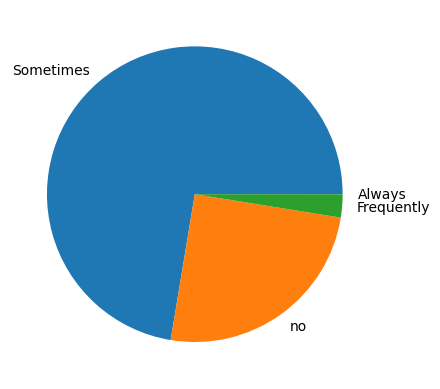

In [38]:
print(df["CALC"].value_counts())
plt.pie(x=df["CALC"].value_counts(), labels=df["CALC"].value_counts().index, );

In [39]:
d={"Sometimes":1, "Frequently":2, "Always":4, "no":0}
df["CALC"]=df["CALC"].map(d)

MTRANS
Public_Transportation    27798
Automobile                5939
Walking                    747
Motorbike                   57
Bike                        57
Name: count, dtype: int64


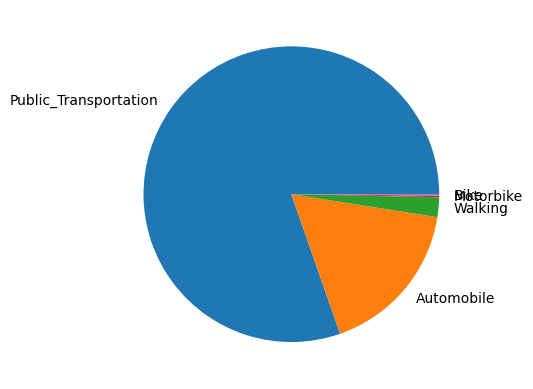

In [40]:
print(df["MTRANS"].value_counts())
plt.pie(x=df["MTRANS"].value_counts(), labels=df["MTRANS"].value_counts().index, );

In [42]:
df["Walking"]=np.where(df["MTRANS"]=="Walking", 0, 1)

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64


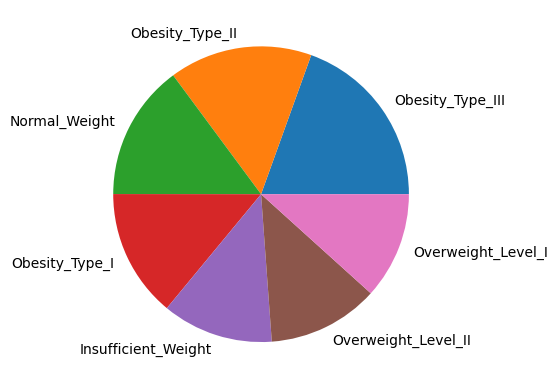

In [44]:
print(df["NObeyesdad"].value_counts())
plt.pie(x=df["NObeyesdad"].value_counts(), labels=df["NObeyesdad"].value_counts().index, );

In [45]:
d={
    "Insufficient_Weight":0,
    "Normal_Weight":1,
    "Overweight_Level_I":2,
    "Overweight_Level_II":3,
    "Obesity_Type_I":4,
    "Obesity_Type_II":5,
    "Obesity_Type_III":6
}
df["Class"]=df["NObeyesdad"].map(d)

In [47]:
df.sample(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Walking,Class
18370,18370,1,21.000000,1.690000,64.400000,1,1,3.000000,3.000000,1,0,1.000000,0,0.000000,0.000000,1,Walking,Normal_Weight,0,1.0
4287,4287,0,21.282530,1.742500,133.554686,1,1,3.000000,3.000000,1,0,1.716590,0,1.464674,0.764717,1,Public_Transportation,Obesity_Type_III,1,6.0
31673,31673,0,26.000000,1.580000,73.000000,1,0,3.000000,3.000000,1,0,3.000000,0,2.000000,1.000000,1,Public_Transportation,NaN,1,NaN
31632,31632,1,22.000000,1.600000,94.000000,1,1,3.000000,3.000000,1,0,2.000000,0,0.000000,1.000000,1,Public_Transportation,NaN,1,NaN
20639,20639,1,19.000000,1.800000,85.000000,0,1,2.000000,4.000000,2,0,3.000000,1,2.000000,1.000000,0,Walking,Overweight_Level_I,0,2.0
9536,9536,1,22.580038,1.825718,121.560938,1,1,3.000000,2.272801,1,0,1.850344,0,0.344013,0.000000,1,Public_Transportation,Obesity_Type_II,1,5.0
24620,24620,0,21.000000,1.630000,66.000000,1,1,3.000000,1.000000,1,0,3.000000,0,1.000000,0.000000,1,Public_Transportation,NaN,1,NaN
6184,6184,0,22.829753,1.732951,133.043941,1,1,3.000000,3.000000,1,0,2.675567,0,1.601950,0.265790,1,Public_Transportation,Obesity_Type_III,1,6.0
17132,17132,1,31.386405,1.764140,119.081804,1,1,2.964319,3.000000,1,1,1.971774,0,0.945220,0.360370,1,Automobile,Obesity_Type_II,1,5.0
20377,20377,0,21.000000,1.630000,68.000000,1,1,2.000000,3.000000,1,0,3.000000,0,2.000000,1.000000,1,Automobile,Overweight_Level_I,1,2.0


## Modelleme

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

g = GaussianNB()
b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()

def algo_test(x, y):
    modeller=[g, b, l, d, r, gb, kn]
    isimler=["GaussianNB", "BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(np.array(x_test) if model==kn else x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34598 entries, 0 to 34597
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34598 non-null  int64  
 1   Gender                          34598 non-null  int64  
 2   Age                             34598 non-null  float64
 3   Height                          34598 non-null  float64
 4   Weight                          34598 non-null  float64
 5   family_history_with_overweight  34598 non-null  int64  
 6   FAVC                            34598 non-null  int64  
 7   FCVC                            34598 non-null  float64
 8   NCP                             34598 non-null  float64
 9   CAEC                            34598 non-null  int64  
 10  SMOKE                           34598 non-null  int64  
 11  CH2O                            34598 non-null  float64
 12  SCC                             

In [50]:
train=df.iloc[:20758]
test=df.iloc[20758:]

In [54]:
x=train.drop(["id", "MTRANS", "NObeyesdad", "Class"], axis=1)
y=train[["Class"]]
xt=test.drop(["id", "MTRANS", "NObeyesdad", "Class"], axis=1)
x.shape, y.shape, xt.shape

((20758, 16), (20758, 1), (13840, 16))

In [53]:
algo_test(x,y)

Veriler hazır modeller deneniyor
GaussianNB()  modeli eğitiliyor!..
[[ 657   63    1    0   27    0    7]
 [ 282  339   65   28  151    3   39]
 [  25   92  213   35  322   36   10]
 [   4   55   40  149  405  108    2]
 [   2   13   18   34  516  261   14]
 [   0    1    2   12   49  941    0]
 [   1    0    2    1    0    1 1202]]
BernoulliNB()  modeli eğitiliyor!..
[[ 321  123   24   14  149   88   36]
 [ 199  196  101   68  178   96   69]
 [ 118   75  190   26   95  162   67]
 [  33   45   26  123  253  245   38]
 [   8   18   64   23  493  174   78]
 [   0    4    1   10  223  767    0]
 [   1    1    5    0    1    1 1198]]
LogisticRegression()  modeli eğitiliyor!..


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterat

[[ 590  149   13    2    0    0    1]
 [ 170  559  128   26   16    3    5]
 [   5  159  348   92   83   27   19]
 [   2   50  161  285  186   61   18]
 [   0   12   93  131  419  143   60]
 [   0    0    0   12   85  900    8]
 [   1    0    0    0    5    7 1194]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[ 660   83    7    4    1    0    0]
 [  67  712  107   19    2    0    0]
 [   5   87  502  100   34    2    3]
 [   1   21  114  518   99   10    0]
 [   2    4   40   92  682   31    7]
 [   0    0    0    5   45  951    4]
 [   1    0    0    0    5    1 1200]]
RandomForestClassifier()  modeli eğitiliyor!..


/tmp/ipykernel_33/3015561559.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=model.fit(x_train,y_train)


[[ 683   68    3    1    0    0    0]
 [  40  806   48   13    0    0    0]
 [   3   67  553   92   18    0    0]
 [   0   16   73  604   64    6    0]
 [   2    2   27   57  743   24    3]
 [   0    0    0    4   19  980    2]
 [   1    0    1    0    0    1 1204]]
GradientBoostingClassifier()  modeli eğitiliyor!..


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 698   52    3    1    1    0    0]
 [  33  802   62   10    0    0    0]
 [   2   54  579   78   20    0    0]
 [   0   14   75  600   64   10    0]
 [   2    2   23   51  757   20    3]
 [   0    0    0    2   21  980    2]
 [   1    0    0    0    1    1 1204]]
KNeighborsClassifier()  modeli eğitiliyor!..


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[ 677   74    2    0    2    0    0]
 [ 130  660   92   24    1    0    0]
 [   3   92  512  103   23    0    0]
 [   0   31  114  512   98    8    0]
 [   2    1   35   96  688   32    4]
 [   0    0    0    7   21  972    5]
 [   1    0    0    0    6    9 1191]]
Eğitim tamamlandı.
En başarılı model:  GradientBoostingClassifier
Confusion Matrix:
[[ 698   52    3    1    1    0    0]
 [  33  802   62   10    0    0    0]
 [   2   54  579   78   20    0    0]
 [   0   14   75  600   64   10    0]
 [   2    2   23   51  757   20    3]
 [   0    0    0    2   21  980    2]
 [   1    0    0    0    1    1 1204]]
classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94       755
         1.0       0.87      0.88      0.88       907
         2.0       0.78      0.79      0.79       733
         3.0       0.81      0.79      0.80       763
         4.0       0.88      0.88      0.88       858
         5.0       0.97      0.98 

,Accuracy,Precision,Recall,F1
GradientBoostingClassifier,0.902376,0.902376,0.902376,0.902376
RandomForestClassifier,0.894830,0.894830,0.894830,0.894830
DecisionTreeClassifier,0.838953,0.838953,0.838953,0.838953
KNeighborsClassifier,0.836866,0.836866,0.836866,0.836866
LogisticRegression,0.689627,0.689627,0.689627,0.689627
GaussianNB,0.644990,0.644990,0.644990,0.644990
BernoulliNB,0.527938,0.527938,0.527938,0.527938


In [55]:
gb=GradientBoostingClassifier()
model=gb.fit(x,y)
pred=model.predict(xt)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
pred

array([5., 2., 6., ..., 0., 1., 5.])

In [57]:
test["Class"]=pred
test.head()

/tmp/ipykernel_33/2729555432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Class"]=pred


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Walking,Class
20758,20758,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,1,0,2.825629,0,0.855400,0.000000,1,Public_Transportation,NaN,1,5.0
20759,20759,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,1,0,3.000000,0,1.000000,0.000000,1,Public_Transportation,NaN,1,2.0
20760,20760,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,1,0,2.621877,0,0.000000,0.250502,1,Public_Transportation,NaN,1,6.0
20761,20761,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,1,0,2.786417,0,0.094851,0.000000,1,Public_Transportation,NaN,1,4.0
20762,20762,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,1,0,2.653531,0,0.000000,0.741069,1,Public_Transportation,NaN,1,6.0


In [58]:
d={
    0.0:"Insufficient_Weight",
    1.0:"Normal_Weight",
    2.0:"Overweight_Level_I",
    3.0:"Overweight_Level_II",
    4.0:"Obesity_Type_I",
    5.0:"Obesity_Type_II",
    6.0:"Obesity_Type_III"
}
test["NObeyesdad"]=test["Class"].map(d)

/tmp/ipykernel_33/1207028703.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["NObeyesdad"]=test["Class"].map(d)


In [59]:
test.sample(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Walking,Class
26085,26085,0,22.000000,1.660000,60.000000,1,0,2.000000,1.0,1,0,2.000000,0,0.00000,0.000000,0,Public_Transportation,Normal_Weight,1,1.0
30701,30701,0,19.434709,1.525691,42.000000,1,1,3.000000,1.0,2,0,1.895876,0,0.00000,0.560887,1,Public_Transportation,Insufficient_Weight,1,0.0
21140,21140,1,31.000000,1.710000,72.000000,1,1,2.000000,3.0,1,1,2.000000,0,1.00000,0.000000,1,Automobile,Normal_Weight,1,1.0
29904,29904,1,21.000000,1.800000,97.000000,1,1,2.000000,3.0,1,0,2.000000,1,1.00000,1.000000,1,Public_Transportation,Overweight_Level_II,1,3.0
26116,26116,0,21.798856,1.719913,132.145549,1,1,3.000000,3.0,1,0,2.720050,0,1.52001,0.906247,1,Public_Transportation,Obesity_Type_III,1,6.0
21688,21688,1,30.255744,1.750085,112.348722,1,1,2.699282,3.0,1,0,1.038128,0,1.00000,0.000000,1,Public_Transportation,Obesity_Type_II,1,5.0
31955,31955,1,21.000000,1.712061,75.000000,1,1,2.000000,3.0,1,0,1.333707,0,1.00000,1.000000,1,Public_Transportation,Overweight_Level_I,1,2.0
21035,21035,0,21.000000,1.650000,67.000000,1,1,2.000000,3.0,1,0,2.000000,0,1.00000,1.000000,1,Public_Transportation,Normal_Weight,1,1.0
30810,30810,0,18.000000,1.700000,50.000000,0,1,1.000000,3.0,2,0,2.000000,0,1.00000,1.000000,1,Public_Transportation,Insufficient_Weight,1,0.0
33782,33782,0,22.000000,1.550000,53.000000,1,1,2.000000,3.0,1,0,2.000000,0,3.00000,1.000000,1,Public_Transportation,Normal_Weight,1,1.0


In [61]:
test[["id", "NObeyesdad"]].to_csv('submission.csv', index=False)

## Sonuç

Obezite riskini tahmin etmek amacıyla geliştirilen çok sınıflı makine öğrenmesi modellerinde `GradientBoostingClassifier` ile %90 başarı elde edilmiştir.